In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
df=pd.read_csv("/content/Telco_Customer_Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There is no null values

In [6]:
# Selecting categorical features to encode
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [7]:
# Checking how many values each categorical feature has
categorical_features=categorical_features.drop(['customerID','TotalCharges'])
for feature in categorical_features:
    print(f"{feature}: {df[feature].value_counts()}\n")

gender: gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection: DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport: TechSupport
No    

In [8]:
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [9]:
# change TotalCharges data type from object to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [10]:
df["TotalCharges"].isnull().sum()

np.int64(11)

## after converting TotalCharges to float null values appered so we need to deal with them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df[(df['tenure'] == 0) & (df['TotalCharges'].isnull())]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As it shows from the code above the customer with a TotalCharges null value has tenure = 0, which likely means they are a new customer who hasn't been billed yet.

it's logical that their TotalCharges is 0 so i will replace the nulls in TotalCharges with 0.

In [14]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0


In [15]:
df['TotalCharges'].isnull().sum()

np.int64(0)

## encoding categorical features

In [16]:
df.drop(['customerID'],axis=1,inplace=True)

In [17]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [18]:
contract_order = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

df['Contract'] = df['Contract'].map(contract_order)
df['Contract'].value_counts()

,count
Contract,
0,3875
2,1695
1,1473


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
# Replace No internet service with no
df = df.replace('No internet service', 'No')


In [21]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[binary_features] = df[binary_features].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


<ipython-input-21-e9fb919eb1fd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_features] = df[binary_features].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [22]:
for i in binary_features:
  print(df[i].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
PhoneService
1    6361
0     682
Name: count, dtype: int64
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64
TechSupport
0    4999
1    2044
Name: count, dtype: int64
StreamingTV
0    4336
1    2707
Name: count, dtype: int64
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64


In [33]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['MultipleLines', 'InternetService', 'PaymentMethod'], dtype='object')


In [34]:
for feature in categorical_features:
    print(f"{feature}: {df[feature].value_counts()}\n")

MultipleLines: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

PaymentMethod: PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



In [23]:
# One hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_1                               7043 non-null   bool   
 5   Partner_1                              7043 non-null   bool   
 6   Dependents_1                           7043 non-null   bool   
 7   PhoneService_1                         7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

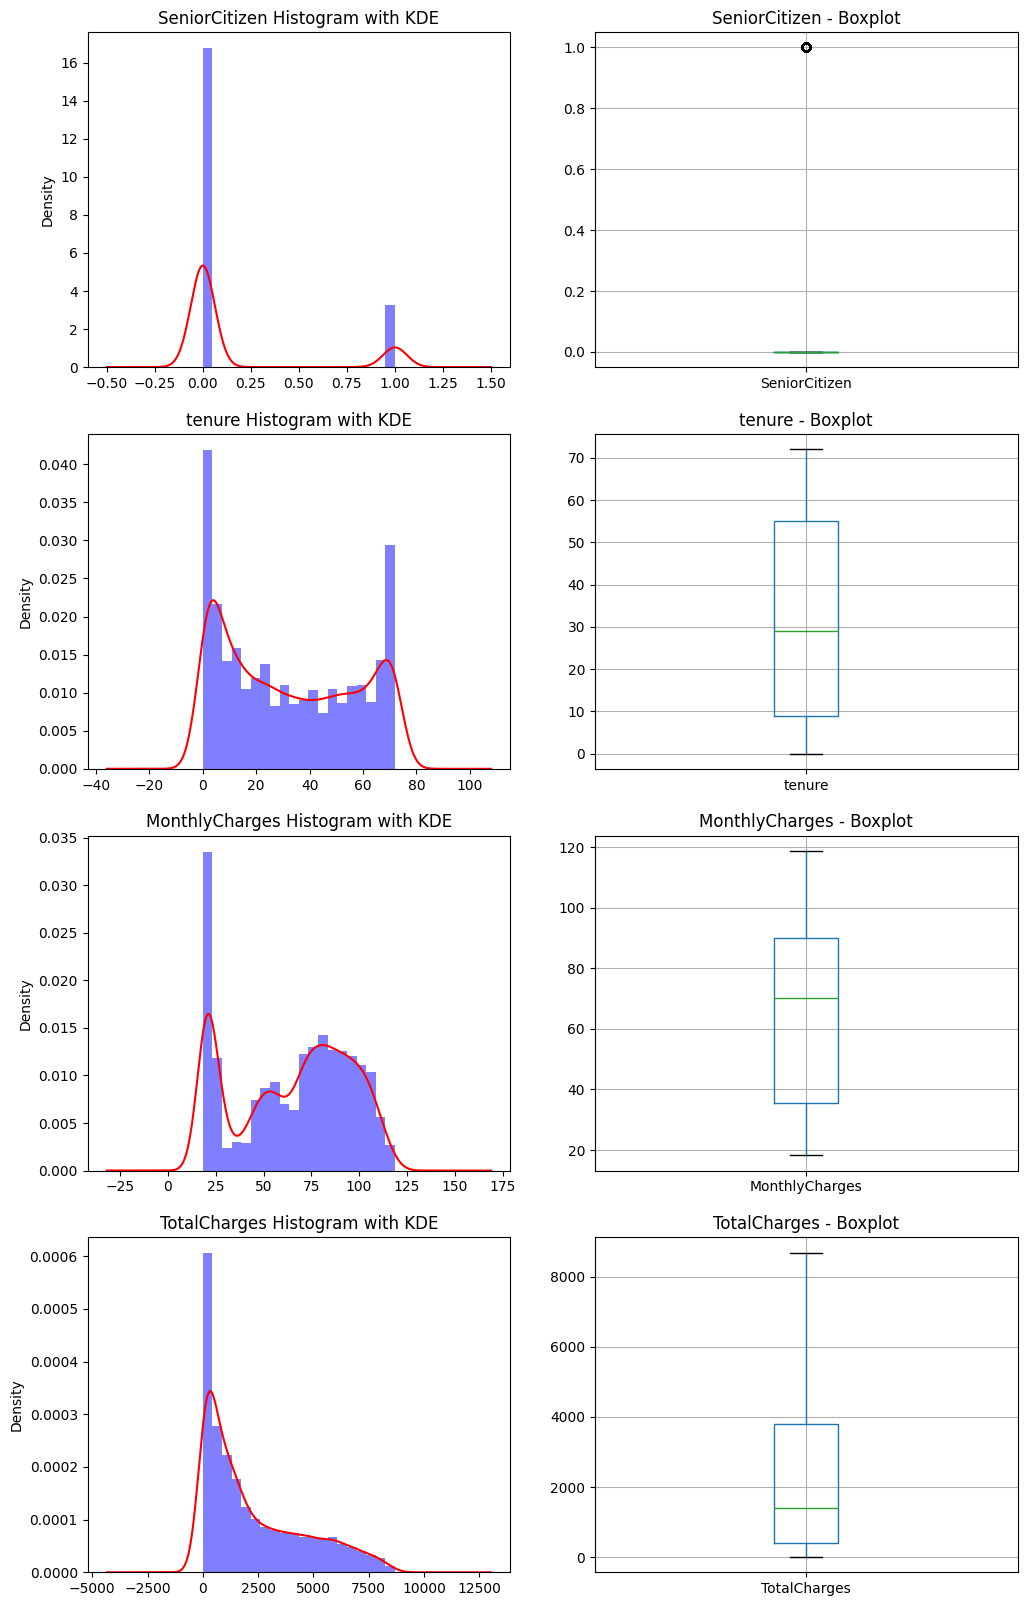

In [25]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
c=df.select_dtypes(include=['int64','float64'])
fig, axes = plt.subplots(len(c.columns), 2, figsize=(12, 5 * len(c.columns)))

for i, col in enumerate(c.columns):
    try:
        df[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
        df[col].plot(kind='kde', ax=axes[i, 0], color='red')

        axes[i, 0].set_title(f'{col} Histogram with KDE')
        df.boxplot(column=col, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} - Boxplot')

    except IndexError:
      print(f"Error: Could not create plots for column '{col}'")
      break
    except Exception as e:
      print(f"An error occurred while plotting '{col}': {e}")
      continue

## as it shows from the box plots that continuous features dont have outliers

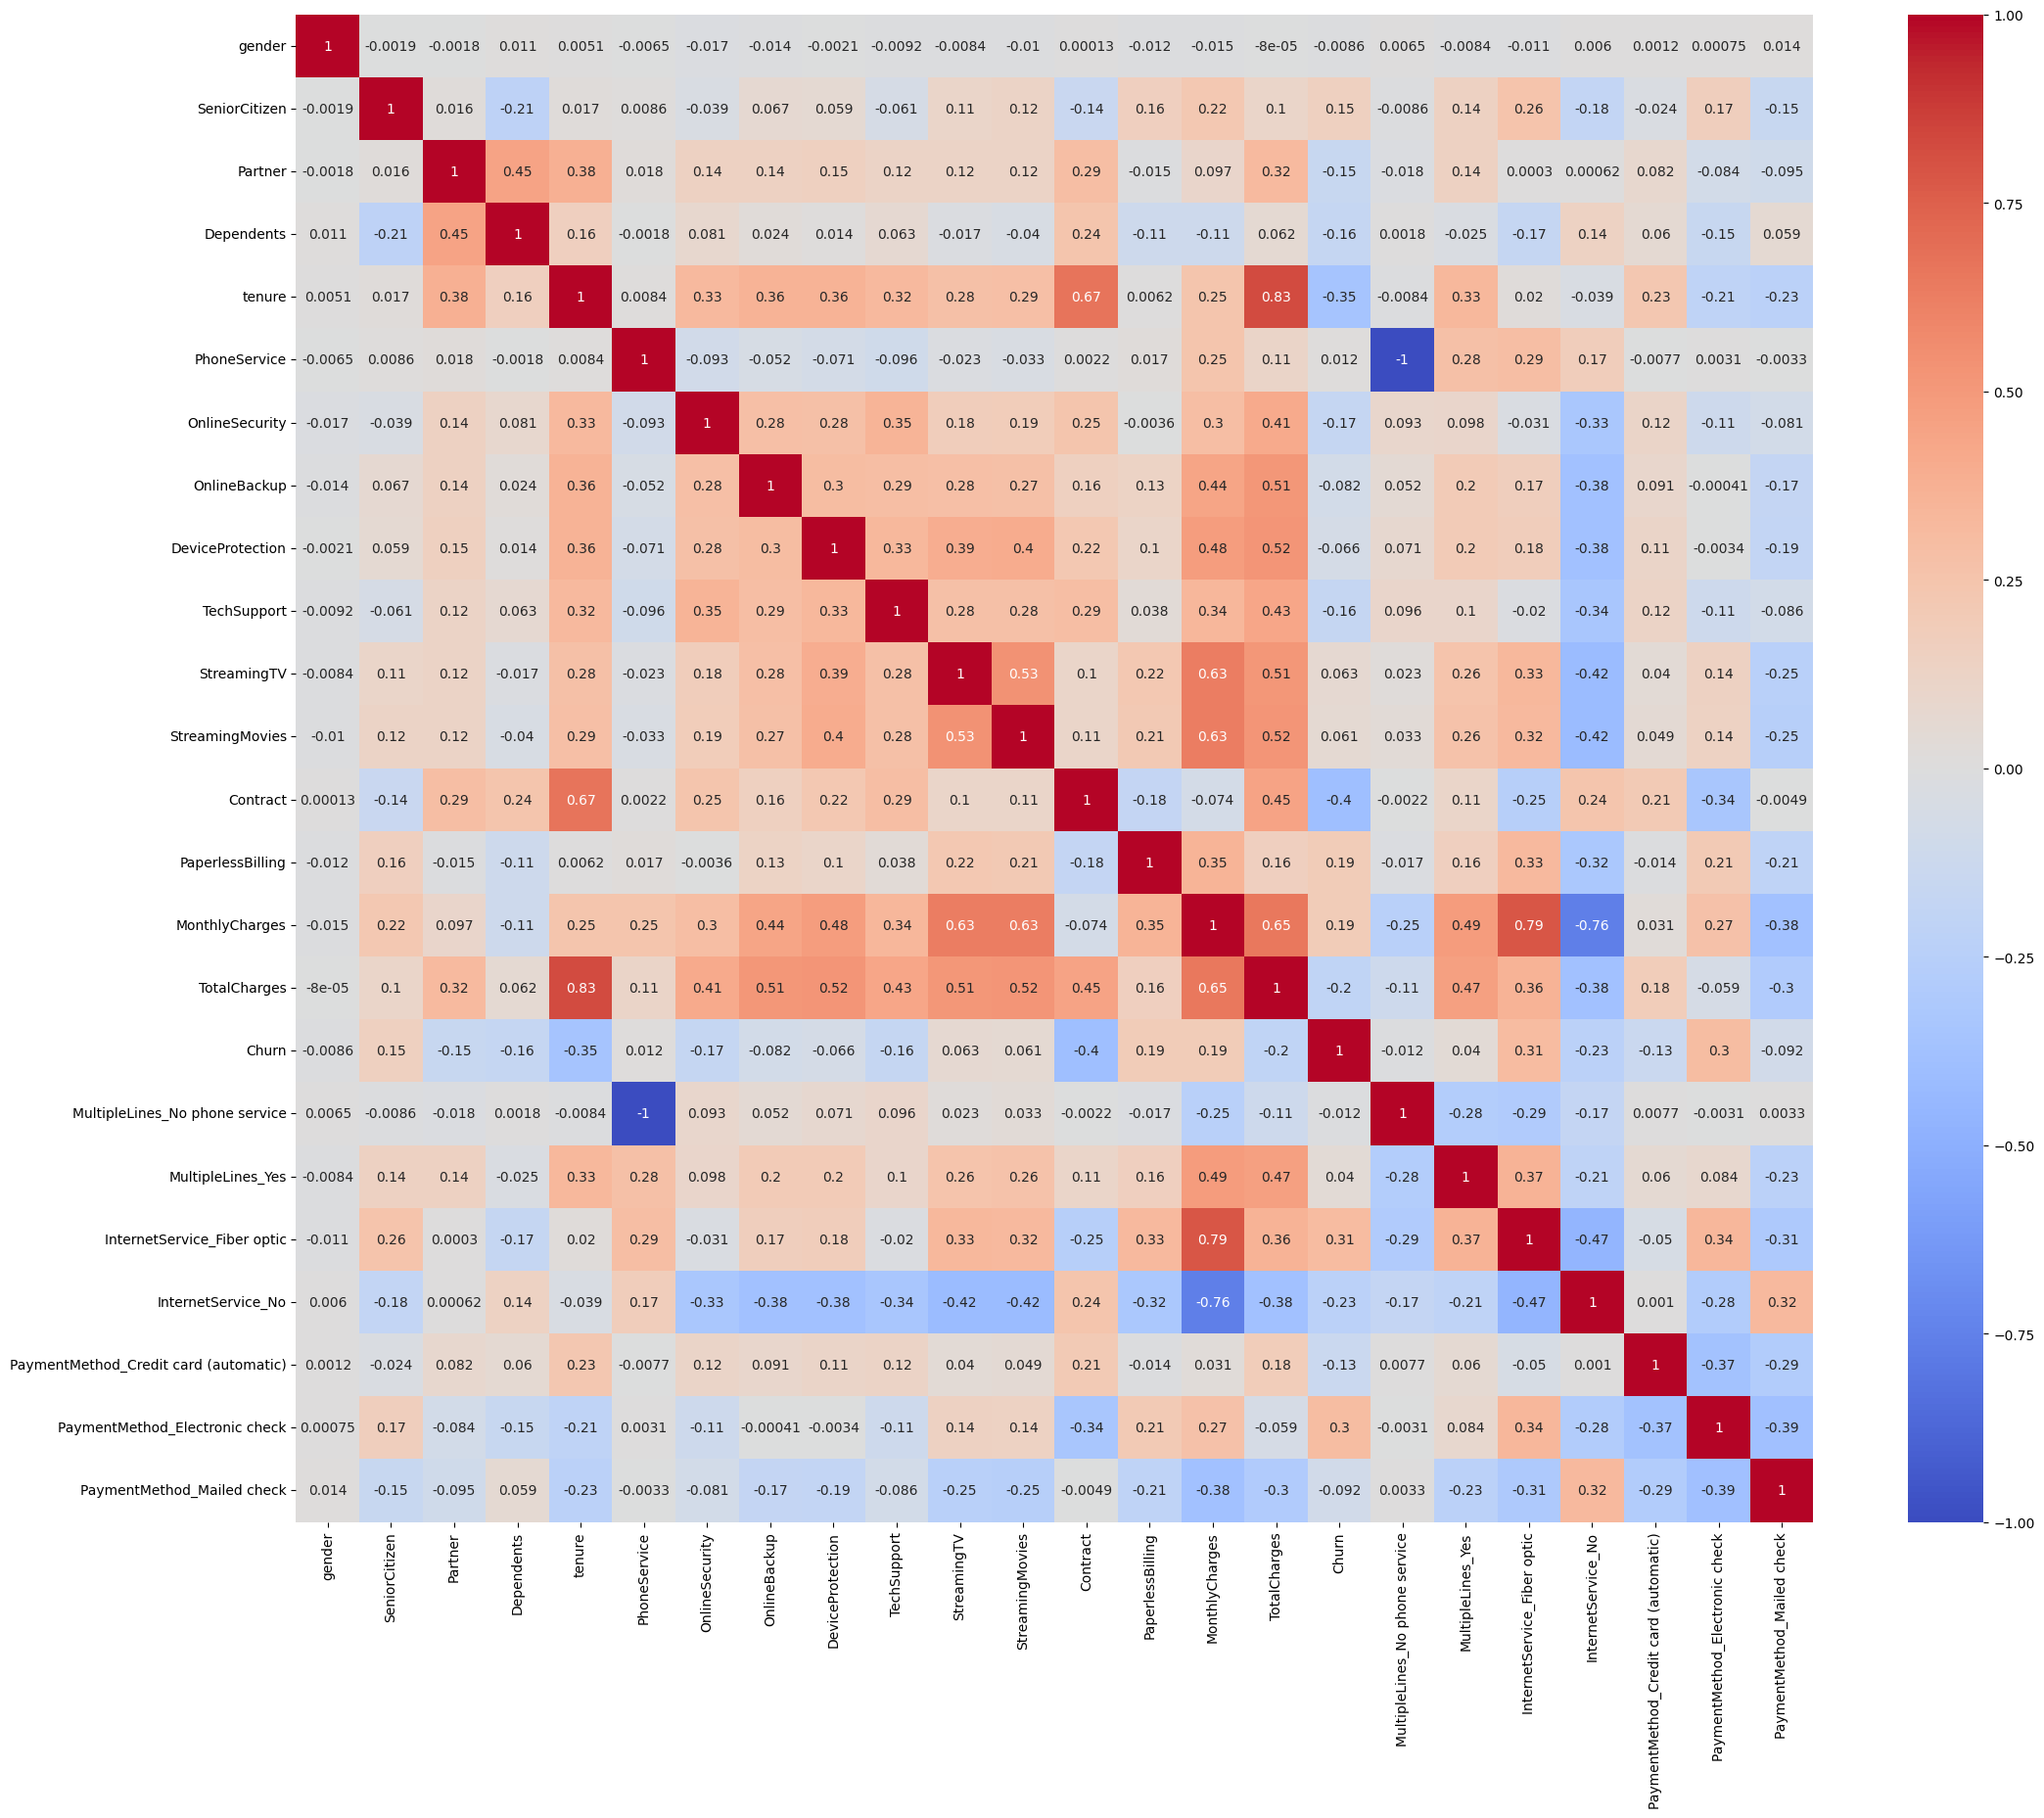

In [38]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

# Training the model

In [75]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']


In [76]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [77]:
# Over sampling data because the target churn is imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x, y)


In [78]:

y.value_counts()

,count
Churn,
0,5174
1,5174


In [79]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 10348 non-null  int64  
 1   SeniorCitizen                          10348 non-null  int64  
 2   Partner                                10348 non-null  int64  
 3   Dependents                             10348 non-null  int64  
 4   tenure                                 10348 non-null  int64  
 5   PhoneService                           10348 non-null  int64  
 6   OnlineSecurity                         10348 non-null  int64  
 7   OnlineBackup                           10348 non-null  int64  
 8   DeviceProtection                       10348 non-null  int64  
 9   TechSupport                            10348 non-null  int64  
 10  StreamingTV                            10348 non-null  int64  
 11  St

In [80]:
# Scalling continuous features
from sklearn.preprocessing import StandardScaler
continuous_features = ['TotalCharges', 'MonthlyCharges', 'tenure']
scaler = StandardScaler()

# Apply scaling only to selected features
x[continuous_features] = scaler.fit_transform(x[continuous_features])

In [81]:
#XGBoost Classifier
from xgboost import XGBClassifier


n = 50
XGBoost_accuracy = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)

    xgboost = XGBClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    XGBoost_accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of XGBoost Classifier
print('Average accuracy of XGBoost Classifier:', np.mean(XGBoost_accuracy))

Average accuracy of XGBoost Classifier: 0.8441739130434782


In [82]:
# GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB
n = 50
G_accuracy = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)

    G = GaussianNB()
    G.fit(X_train, y_train)

    y_pred = G.predict(X_test)
    G_accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy of GaussianNB Classifier
print('Average accuracy of GaussianNB Classifier:', np.mean(G_accuracy))

Average accuracy of GaussianNB Classifier: 0.80143961352657


In [88]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
n = 50
accuracy = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
# see the average accuracy of Random forest Classifier
print('Average accuracy of Random forest :', np.mean(accuracy))

Average accuracy of Random forest : 0.8474685990338164


In [86]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

n = 50
accuracy = []

for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=i, stratify=y)

    xgboost = GradientBoostingClassifier()
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# see the average accuracy ofGradientBoostingClassifier
print('Average accuracy of GradientBoostingClassifier:', np.mean(accuracy))

Average accuracy of GradientBoostingClassifier: 0.8358454106280192


## Hyperparameter tunning

In [91]:
# Hyper parameter tunning for Random forest Classifier using RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier()
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, random_state=42, n_jobs=-1, verbose=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

random_search.fit(X_train, y_train)

# Best parameters & model performance
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': np.int64(200), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}
Accuracy: 0.8497584541062801


In [92]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1035
           1       0.83      0.88      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [94]:
# Hyper parameter tunning for Random forest Classifier using GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters & model performance
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.8555555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.84      0.87      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

